# Analytics, regression and SVM

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

In [53]:
def replace_feeling(value):
    if value >= 5:
        return 1
    else:
        return 2
    
# def replace_feeling(value):
#     if value == 1:
#         return 3
#     elif value == 3:
#         return 3
#     elif value == 5:
#         return 2
#     elif value == 7:
#         return 1
#     elif value == 9:
#         return 1


def features_calc(file_list):
    # List to store results
    hrv_mean_list = []
    dfa_mean_list = []
    sport_list = []
    date_list = []
    feeling_list = []
    rpe_list = []
    dropping_list_all = []
    rmssd_list = []
    mean_rr_list = []
    sdnn_list = []
    mean_hr_list = []
    std_hr_list = []
    min_hr_list = []
    max_hr_list = []
    nnxx_list = []
    pnnx_list = []

    # Loop through each file in the directory
    for file in file_list:
        # Read data from the file
        data = pd.read_csv(file)
        
        sport = data['sport'][0]
        date = data['date'][0]
        feeling = data['feeling'][0]
        rpe = data['rpe'][0]
        sport_list.append(sport)
        date_list.append(date)
        feeling_list.append(int(feeling))
        rpe_list.append(rpe)

        data = data.drop(columns=['sport', 'date'])
        for j in range(0,len(data.columns)):
            if not data.iloc[:, j].notnull().all():
                dropping_list_all.append(j)        
            
            # filling nan with mean in any columns

        for j in range(0,len(data.columns)):
            data.iloc[:,j]=data.iloc[:,j].fillna(data.iloc[:,j].mean())
        # another sanity check to make sure that there are not more any nan
        data.isnull().sum()

        hrv_mean = np.mean(data['hrv'])
        dfa_mean = np.mean(data['dfa'])

        rr = (60/data['hrv'])*1000

        # RMSSD: take the square root of the mean square of the differences
        rmssd = np.sqrt(np.mean(np.square(np.diff(rr))))

        # Mean RR
        mean_rr = np.mean(rr)
        
        # SDNN
        sdnn = np.std(rr)
        
        # Mean HR
        mean_hr = 60 * 1000/np.mean(rr)
        
        # STD HR
        std_hr = np.std(data['hrv'])
        
        # Min HR
        min_hr = np.min(data['hrv'])
        
        # Max HR
        max_hr = np.max(data['hrv'])
        
        # NNxx: sum absolute differences that are larger than 50ms
        nnxx = np.sum(np.abs(np.diff(rr)) > 50)*1
        
        # pNNx: fraction of nnxx of all rr-intervals
        pnnx = 100 * nnxx / len(rr)


        hrv_mean_list.append(hrv_mean)
        dfa_mean_list.append(dfa_mean)

        rmssd_list.append(rmssd)
        mean_rr_list.append(mean_rr)
        sdnn_list.append(sdnn)
        std_hr_list.append(std_hr)
        min_hr_list.append(min_hr)
        max_hr_list.append(max_hr)
        nnxx_list.append(nnxx)
        pnnx_list.append(pnnx)


    df_mean = pd.DataFrame({
        'date': date_list,
        'sport': sport_list,
        'hrv': hrv_mean_list,
        'dfa': dfa_mean_list,
        'rmssd': rmssd_list,
        'mean rr': mean_rr_list,
        'sdnn': sdnn_list,
        'std': std_hr_list,
        'min hr': min_hr_list,
        'max hr': max_hr_list,
        'nnxx': nnxx_list,
        'pnnx': pnnx_list,
        'feeling': feeling_list,
        'rpe': rpe_list,
    })

    df_mean['feeling'] = df_mean['feeling'].apply(lambda x: replace_feeling(x))
    return df_mean

In [54]:
# os.chdir('C:/Users/Olsen/Desktop/Masteroppgave/')
os.chdir('C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate2/csv_files')

files = glob.glob('*.csv')  # Adjust the path as needed


# df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
# df.info


# files_train, files_test = train_test_split(files, test_size=0.15)
files_train, files_test = train_test_split(files, test_size=0.1, random_state=42)


# df = pd.concat([pd.read_csv(file) for file in files_train], ignore_index=True)
# # df['feeling'] = df['feeling'].apply(lambda x: replace_feeling(x))

# df.info



In [55]:
df_mean_train = features_calc(files)

os.chdir('C:/Users/Olsen/Desktop/Masteroppgave/Data/fitfiler/candidate2/csv_files')
files = glob.glob('*.csv')

df_mean_test = features_calc(files_test)

In [56]:

# # List to store results
# hrv_mean_list = []
# dfa_mean_list = []
# sport_list = []
# date_list = []
# feeling_list = []
# rpe_list = []
# dropping_list_all = []
# rmssd_list = []
# mean_rr_list = []
# sdnn_list = []
# mean_hr_list = []
# std_hr_list = []
# min_hr_list = []
# max_hr_list = []
# nnxx_list = []
# pnnx_list = []

# # Loop through each file in the directory
# for file in files_train:
#     # Read data from the file
#     data = pd.read_csv(file)
    
#     sport = data['sport'][0]
#     date = data['date'][0]
#     feeling = data['feeling'][0]
#     rpe = data['rpe'][0]
#     sport_list.append(sport)
#     date_list.append(date)
#     feeling_list.append(int(feeling))
#     rpe_list.append(rpe)

#     data = data.drop(columns=['sport', 'date'])
#     for j in range(0,len(data.columns)):
#         if not data.iloc[:, j].notnull().all():
#             dropping_list_all.append(j)        
        
#         # filling nan with mean in any columns

#     for j in range(0,len(data.columns)):
#         data.iloc[:,j]=data.iloc[:,j].fillna(data.iloc[:,j].mean())
#     # another sanity check to make sure that there are not more any nan
#     data.isnull().sum()

#     hrv_mean = np.mean(data['hrv'])
#     dfa_mean = np.mean(data['dfa'])

#     rr = (60/data['hrv'])*1000

#     # RMSSD: take the square root of the mean square of the differences
#     rmssd = np.sqrt(np.mean(np.square(np.diff(rr))))

#     # Mean RR
#     mean_rr = np.mean(rr)
    
#     # SDNN
#     sdnn = np.std(rr)
    
#     # Mean HR
#     mean_hr = 60 * 1000/np.mean(rr)
    
#     # STD HR
#     std_hr = np.std(data['hrv'])
    
#     # Min HR
#     min_hr = np.min(data['hrv'])
    
#     # Max HR
#     max_hr = np.max(data['hrv'])
    
#     # NNxx: sum absolute differences that are larger than 50ms
#     nnxx = np.sum(np.abs(np.diff(rr)) > 50)*1
    
#     # pNNx: fraction of nnxx of all rr-intervals
#     pnnx = 100 * nnxx / len(rr)


#     hrv_mean_list.append(hrv_mean)
#     dfa_mean_list.append(dfa_mean)

#     rmssd_list.append(rmssd)
#     mean_rr_list.append(mean_rr)
#     sdnn_list.append(sdnn)
#     std_hr_list.append(std_hr)
#     min_hr_list.append(min_hr)
#     max_hr_list.append(max_hr)
#     nnxx_list.append(nnxx)
#     pnnx_list.append(pnnx)


# df_mean = pd.DataFrame({
#     'date': date_list,
#     'sport': sport_list,
#     'hrv': hrv_mean_list,
#     'dfa': dfa_mean_list,
#     'rmssd': rmssd_list,
#     'mean rr': mean_rr_list,
#     'sdnn': sdnn_list,
#     'std': std_hr_list,
#     'min hr': min_hr_list,
#     'max hr': max_hr_list,
#     'nnxx': nnxx_list,
#     'pnnx': pnnx_list,
#     'feeling': feeling_list,
#     'rpe': rpe_list,
# })

# df_mean['feeling'] = df_mean['feeling'].apply(lambda x: replace_feeling(x))

# # df_mean.dtypes
# # df_mean.info

df_mean_train = features_calc(files_train)
df_mean_test = features_calc(files_test)

In [74]:
num_list = []
cat_list = []

for column in df:
    plt.figure(column, figsize=(5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind='hist')
        num_list.append(column)
    elif is_string_dtype(df[column]):
        df[column].value_counts()[0:10].plot(kind='bar')
        cat_list.append(column)

# num_list = []
# cat_list = []

# for column in df_mean:
#     plt.figure(column, figsize=(2,2))
#     plt.title(column)
#     if is_numeric_dtype(df_mean[column]):
#         df_mean[column].plot(kind='hist')
#         num_list.append(column)
#     elif is_string_dtype(df_mean[column]):
#         df_mean[column].value_counts()[0:10].plot(kind='bar')
#         cat_list.append(column)
    

NameError: name 'df' is not defined

In [58]:
# for i in range(0, len(cat_list)):
#     hue_cat = cat_list[i]
#     sns.pairplot(df_mean, hue=hue_cat)

# sns.pairplot(df)
# sns.pairplot(df_mean)


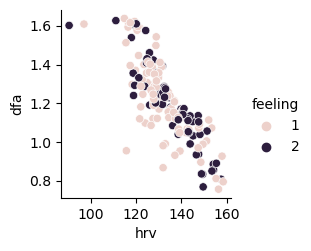

In [73]:
# # for i in range(0, len(cat_list)):
# #     hue_cat = cat_list[i]
# #     sns.pairplot(df, hue=hue_cat)



# list = ['feeling', 'rpe']

# for i in range(0, len(list)):
#     hue_cat = list[i]
#     sns.pairplot(
#         df_mean,
#         # x_vars=['sport', "feeling", 'rpe', "hrv", 'dfa'],
#         # y_vars=["hrv", 'dfa'],
#         hue=hue_cat
#     )

sns.pairplot(
    df_mean_train,
    x_vars=['hrv'],
    y_vars=["dfa"],
    hue='feeling'
)

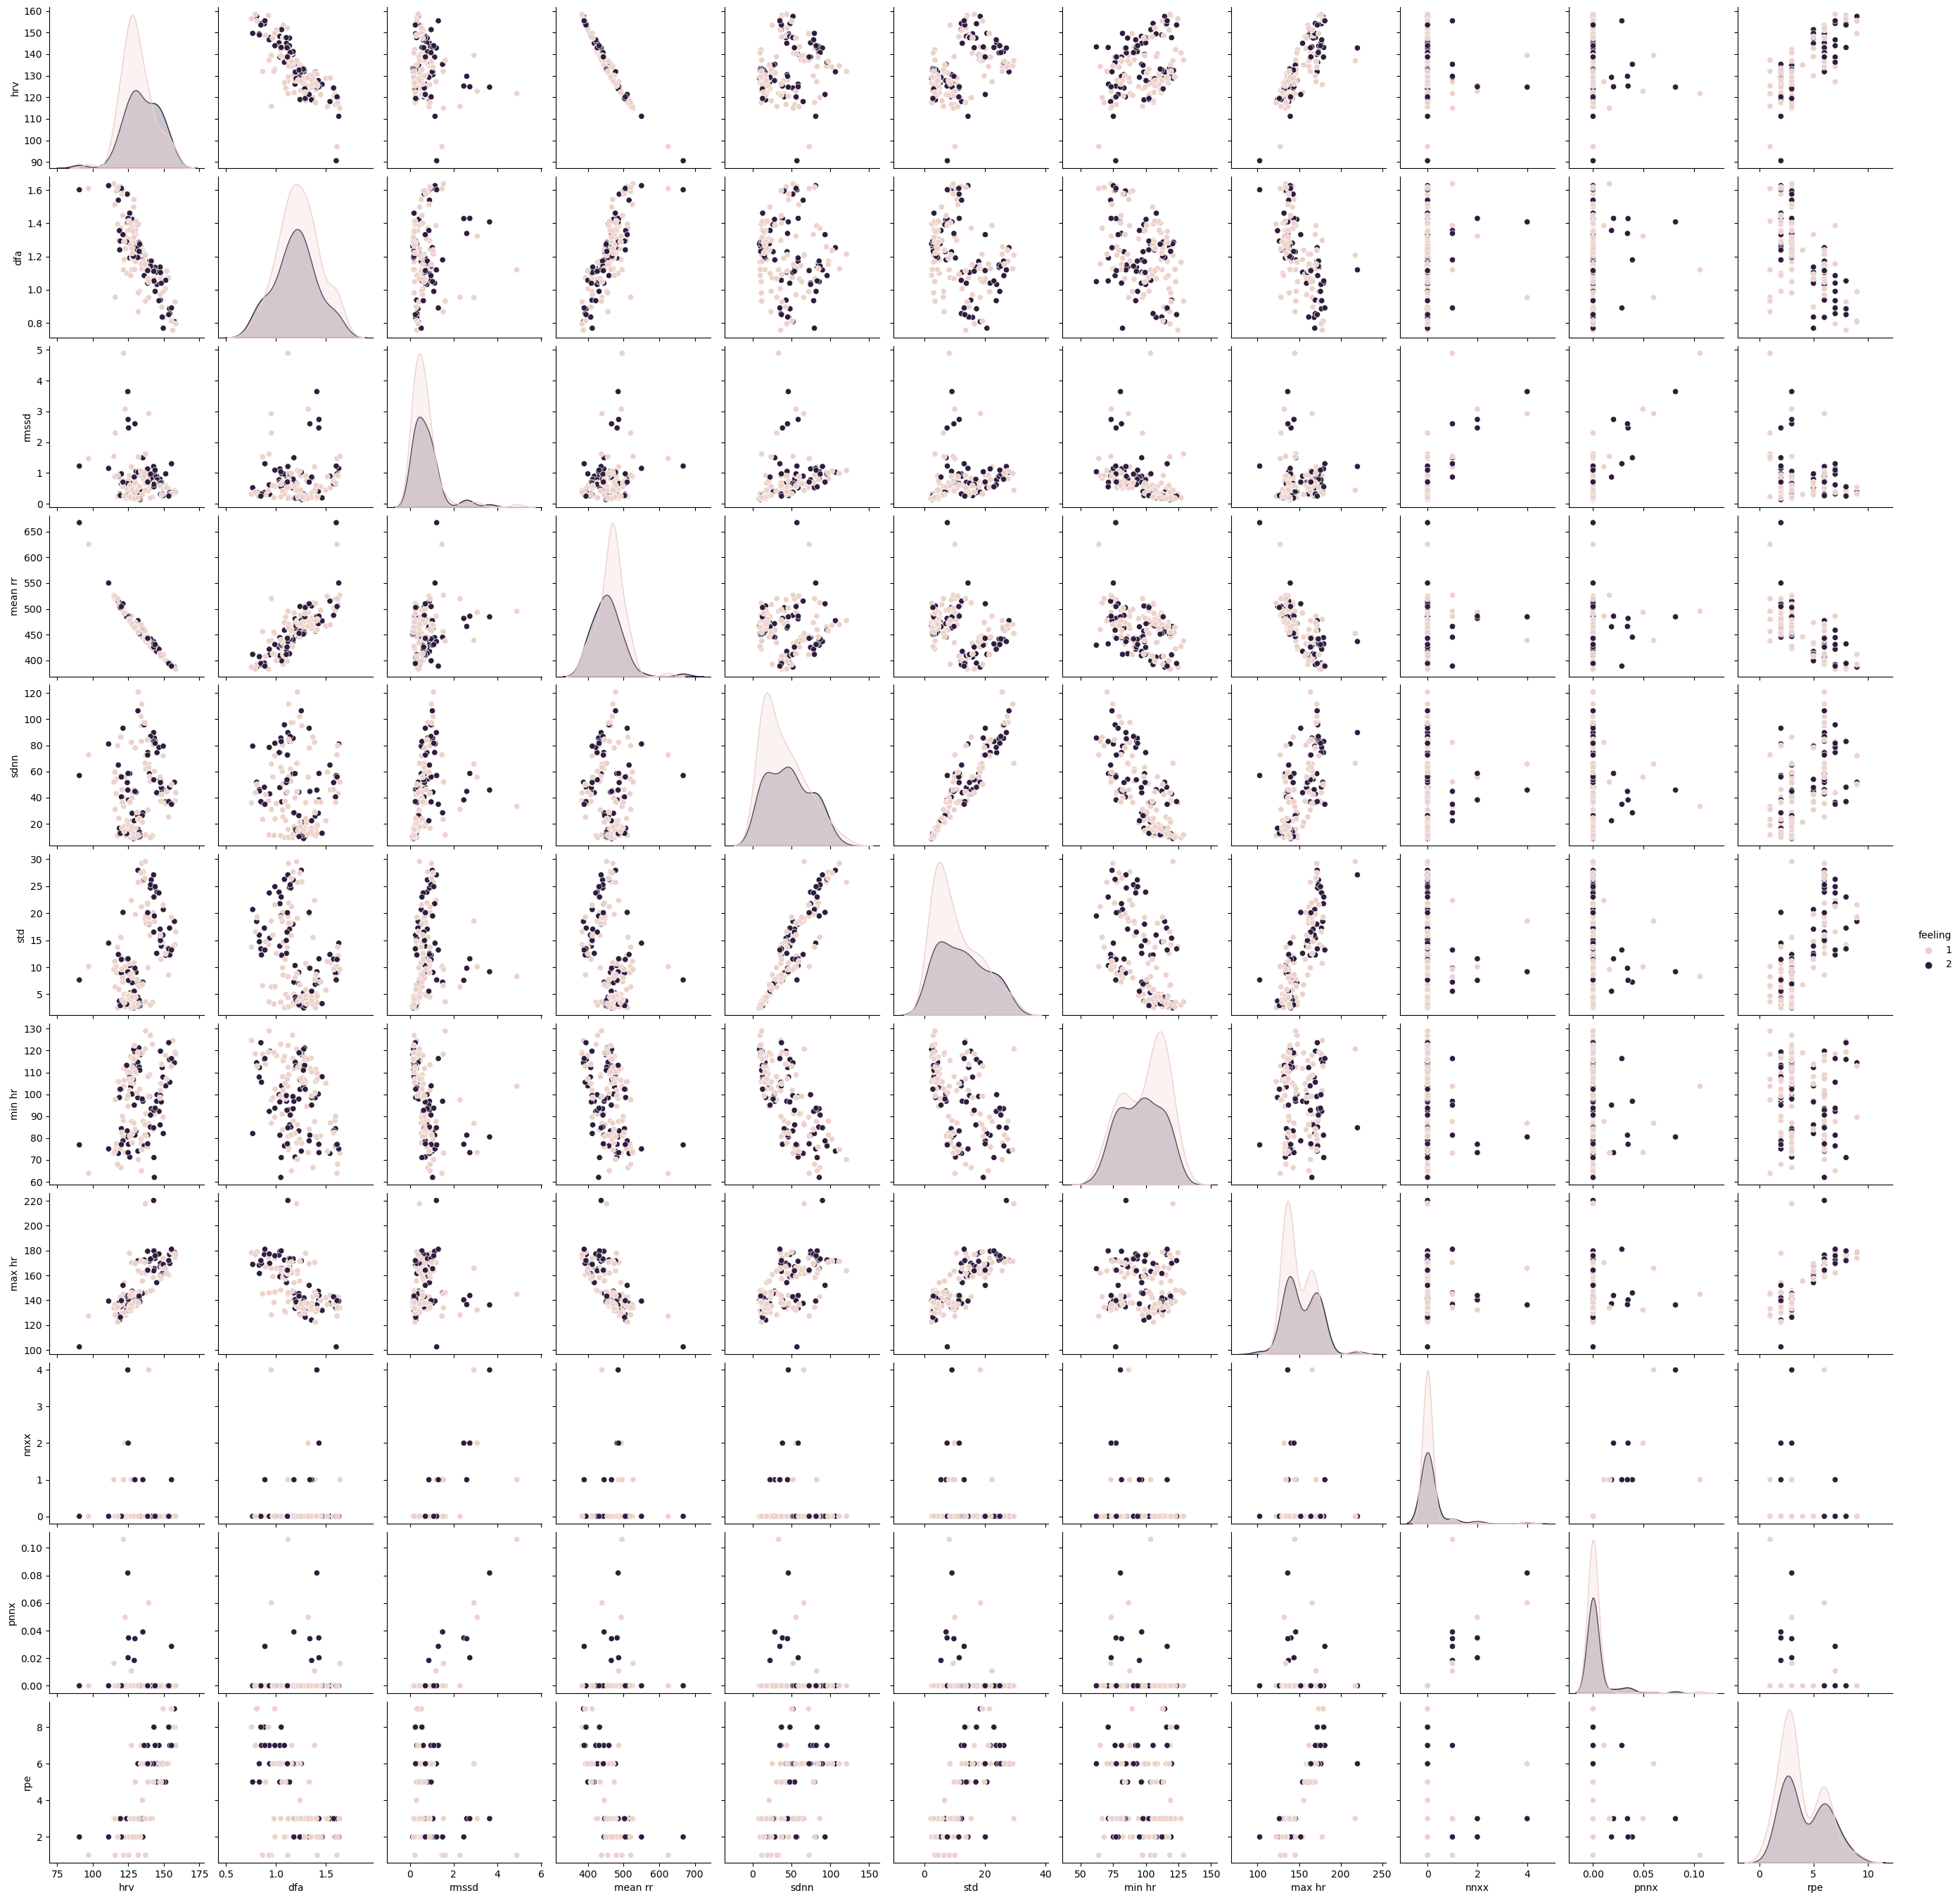

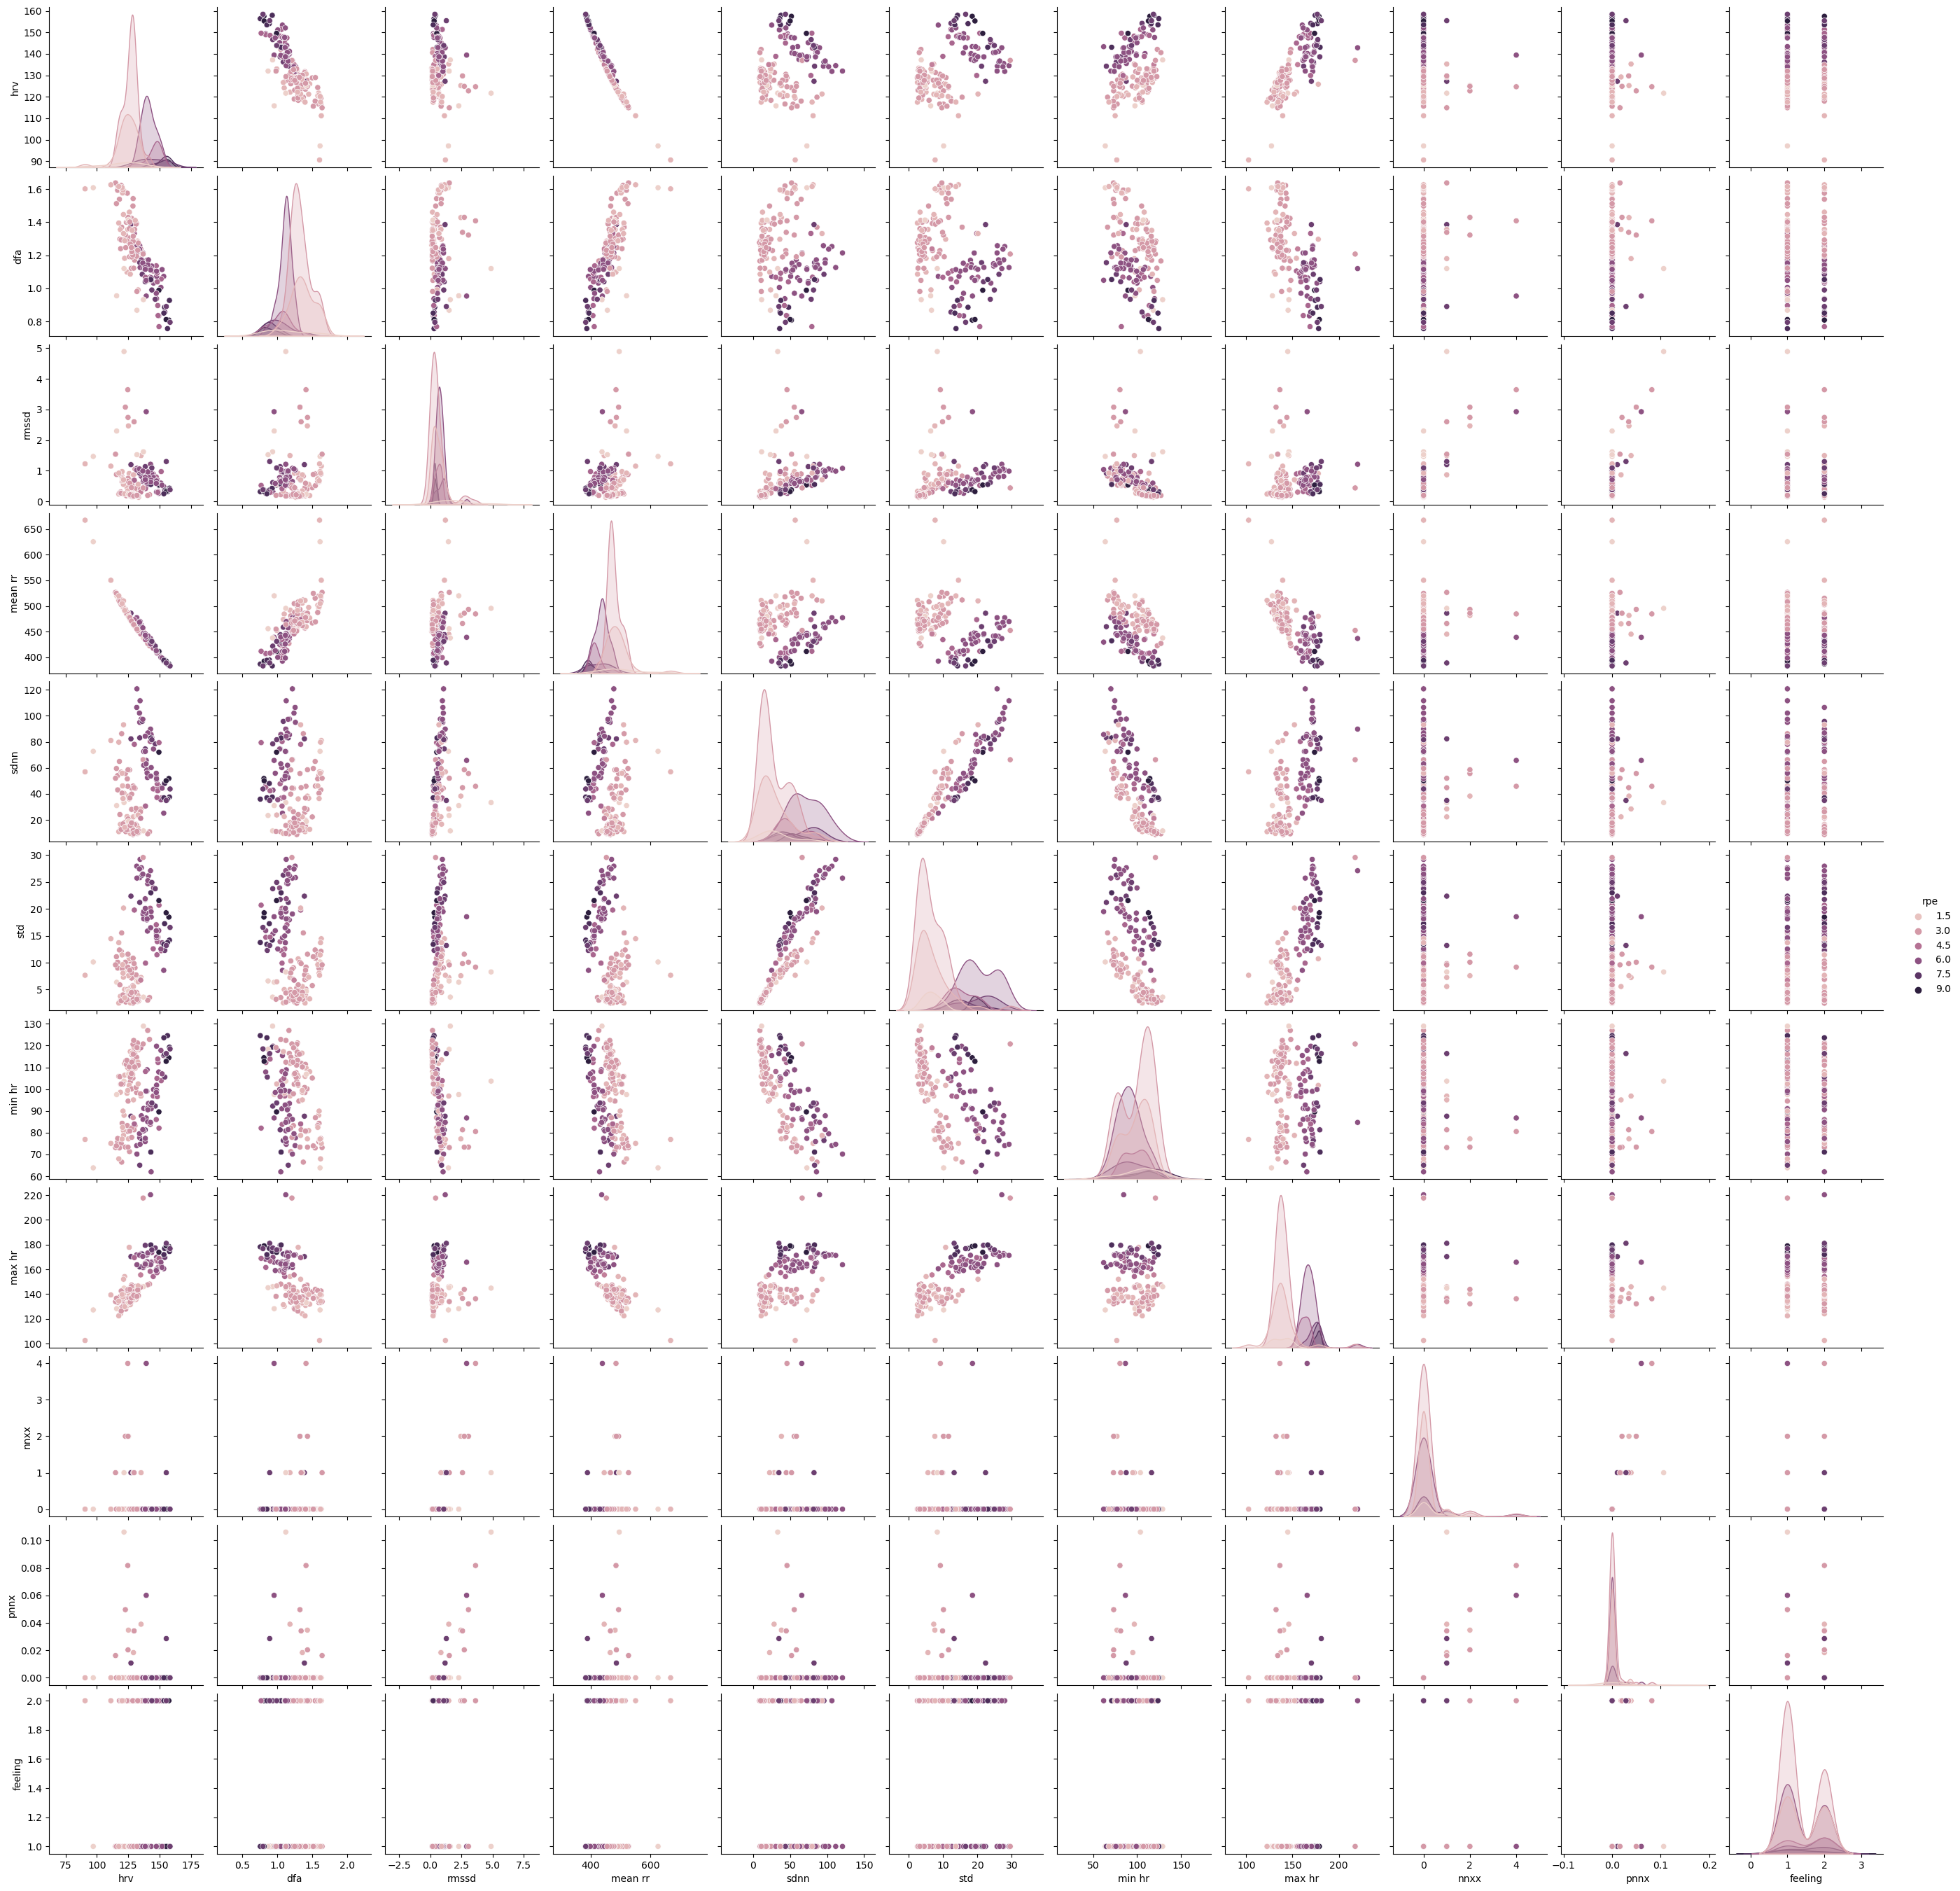

In [60]:
list = ['feeling', 'rpe']

for i in range(0, len(list)):
    hue_cat = list[i]
    sns.pairplot(
        df_mean_train,
        hue=hue_cat
    )

## Correlation

In [61]:
# plt.figure(column, figsize=(10,10))
# correlation = df.corr()
# sns.heatmap(correlation, cmap= 'coolwarm', annot=True)

C:\Users\Olsen\AppData\Local\Temp\ipykernel_12688\164114277.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mean = df_mean_train.corr()


<Axes: >

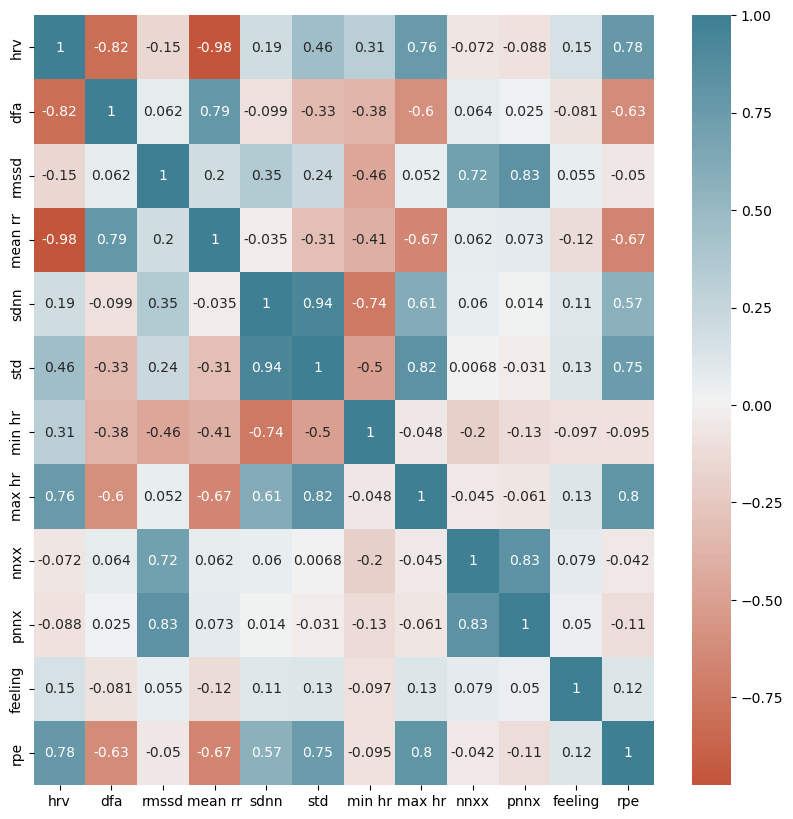

In [62]:
plt.figure(figsize=(10,10))
correlation_mean = df_mean_train.corr()
sns.heatmap(correlation_mean, cmap=sns.diverging_palette(20, 220, n=200), annot=True)

Green means positive, red means negative. The stronger the color, the larger the correlation magnitude. 

## SVM

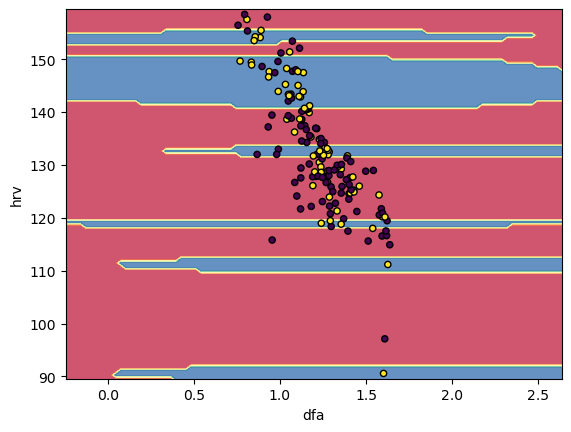

In [63]:
X = df_mean_train[['dfa', 'hrv']]
y = df_mean_train['feeling']


#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

# Trained the model
svm.fit(X, y)
 
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel='dfa',
        ylabel='hrv',
    )
 
# # Scatter plot
# plt.scatter(X[0, :], X[1, :], 
#             c=y, 
#             s=20, edgecolors="k")
# plt.show()

# Scatter plot
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolors="k")
plt.show()

In [64]:
X_test = df_mean_test[['dfa', 'hrv']]
y_test = df_mean_test['feeling']

class_pred= svm.predict(X_test)
print(accuracy_score(y_test, class_pred)*100)



61.111111111111114


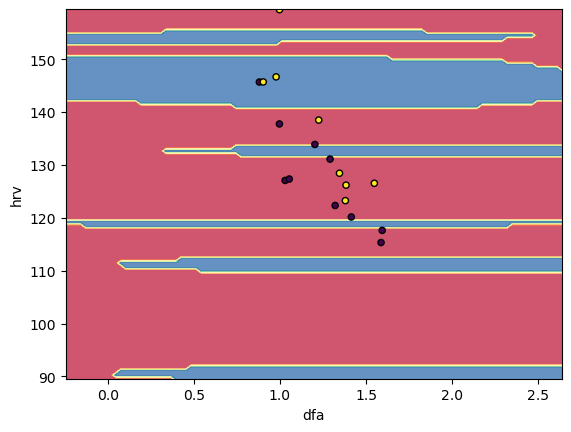

In [65]:
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel='dfa',
        ylabel='hrv',
    )

plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, s=20, edgecolors="k")
plt.show()

In [66]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Assuming df_mean and df_mean_test are already defined
# X = df_mean[['dfa', 'hrv', 'rmssd']]
# y = df_mean['feeling']

# # Build the model
# svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

# # Train the model
# svm.fit(X, y)

# print('1')

# # Scatter plot in 3D
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X['dfa'], X['hrv'], X['rmssd'], c=y, s=20, edgecolors="k", depthshade=True)

# print('2')


# # Plot decision boundary in 3D
# h = .02  # step size in the mesh
# x_min, x_max = X['dfa'].min() - 1, X['dfa'].max() + 1
# y_min, y_max = X['hrv'].min() - 1, X['hrv'].max() + 1
# z_min, z_max = X['rmssd'].min() - 1, X['rmssd'].max() + 1
# xx, yy, zz = np.meshgrid(
#     np.arange(x_min, x_max, h),
#     np.arange(y_min, y_max, h),
#     np.arange(z_min, z_max, h)
# )



# print('3')


# Z = svm.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
# Z = Z.reshape(xx.shape)


# print('4')


# ax.contour3D(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# # Set labels
# ax.set_xlabel('dfa')
# ax.set_ylabel('hrv')
# ax.set_zlabel('rmssd')

# plt.show()


In [67]:
# from sklearn.svm import SVC
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import svm, datasets
# from mpl_toolkits.mplot3d import Axes3D

# # iris = datasets.load_iris()
# # X = iris.data[:, :3]  # we only take the first three features.
# # Y = iris.target

# X = df_mean_train[['dfa', 'hrv', 'rmssd']]
# Y = df_mean_train['feeling']

# #make it binary classification problem
# X = X[np.logical_or(Y==1,Y==2)]
# Y = Y[np.logical_or(Y==1,Y==2)]

# print(X)
# print(Y)

# model = svm.SVC(kernel='linear')
# clf = model.fit(X, Y)

# # The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# # Solve for w3 (z)
# z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

# tmp = np.linspace(-5,5,30)
# x,y = np.meshgrid(tmp,tmp)

# fig = plt.figure()
# ax  = fig.add_subplot(111, projection='3d')
# ax.plot3D(X[Y==1],'ob')
# ax.plot3D(X[Y==2],'sr')
# ax.plot_surface(x, y, z(x,y))
# ax.view_init(30, 60)
# plt.show()